Welcome to the 2nd lab. In this lab we run the boiler plate code which we then gradually speed up. First, we start running it on a single CPU core.

We use the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. A data set of 60K training examples of handwritten monochrome digits with shape 28x28. The task is to classify the digits into categories 0-9. 

Now it's time to install TensorFlow 2.x 

In [ ]:
!pip install tensorflow==2.2.0rc2

Now just make sure you restart the Kernel so that the changes take effect:

![](https://github.com/romeokienzler/TensorFlow/raw/master/images/restart_kernel.png)

After the kernel has been restarted, we'll check if we are on TensorFlow 2.x

In [1]:
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc2':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')



So this worked out. Now it's time to create and run a keras model. Let's use the  MNIST dataset. If you want to learn more on the data set check out the following links

[MNIST](https://en.wikipedia.org/wiki/MNIST_database)  


So in a nutsthell, MNIST contains 60000 28x28 pixel grey scale images of handwritten digits between 0-9 and the corresponding labels. Plus additional 10000 images for testing.

Luckyly, this data set is built in to Keras, so let's load it:

In [2]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


As expected, we get 60000 images of 28 by 28 pixels:

In [3]:
train_images.shape

(60000, 28, 28)

The labels are simply a list of 60000 elements, each one is a number (label) between 0 and 9:

In [4]:
print(train_labels.shape)
print(train_labels)

(60000,)
[5 0 4 ... 5 6 8]


Let's have a look at one image:

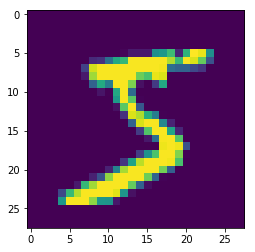

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0])
plt.show()


Let's normalize the data by making sure every pixel value is between 0..1; this is easy in this case:

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0


Let's build and train the model using Keras

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu
from tensorflow.nn import softmax
from time import time



    
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=relu),
    Dense(10, activation=softmax)
])

model.compile(optimizer='adam', 
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

start = time()
model.fit(train_images, train_labels, epochs=5)
stop = time()
elapsed = stop - start

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2503 - accuracy: 0.9287
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1106 - accuracy: 0.9672
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0748 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0562 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0441 - accuracy: 0.9864


In [8]:
print('Elapsed time is %f seconds.'% elapsed) 

Elapsed time is 93.291324 seconds.
